In [82]:
import torch
from torch import nn

In [83]:
device = 'cpu'

## RNN Pytorch Implementations
https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html

In [84]:
rnn = nn.RNNCell(hidden_size=6,input_size=5,bias = False,device = device)

In [85]:
rnn.bias_hh # hidden to hidden bias 

In [86]:
rnn.bias_ih # input to hidden bias 

In [87]:
rnn.weight_ih     # 6*5 

Parameter containing:
tensor([[-0.2079, -0.1371,  0.3167, -0.0728, -0.0923],
        [ 0.3955,  0.3884,  0.2647,  0.3260,  0.2961],
        [ 0.2274, -0.2919,  0.2993,  0.2691, -0.3497],
        [ 0.1934, -0.2687,  0.3761, -0.1984, -0.0185],
        [-0.3789,  0.0921, -0.0720,  0.0133, -0.4003],
        [-0.3757, -0.0361,  0.1784, -0.1611,  0.1311]], requires_grad=True)

In [88]:
rnn.weight_hh  # 6*6 

Parameter containing:
tensor([[-0.2909,  0.1665, -0.2742,  0.3986,  0.1527, -0.0138],
        [-0.0803, -0.3755,  0.2803, -0.1545,  0.1168,  0.2769],
        [ 0.0067, -0.2645, -0.3478,  0.0854, -0.3467, -0.2325],
        [ 0.0353,  0.2871,  0.0682, -0.3234,  0.3103, -0.4015],
        [ 0.0557,  0.3192,  0.1088, -0.3757,  0.2607,  0.1410],
        [-0.3241, -0.3853,  0.3671, -0.2126, -0.0180,  0.0060]],
       requires_grad=True)

In [89]:
test_sample = torch.randn(3,4,5) # 3 batches,each batch has 4 vectors which is 5 dimensional. 

In [90]:
test_sample = test_sample.to(device)

In [91]:
test_sample

tensor([[[ 1.2449, -0.4449, -0.6182, -0.2207,  1.6345],
         [ 1.2992,  1.1123,  1.2630,  0.9423, -0.1036],
         [-0.5036,  0.4709, -0.3713,  2.2211, -0.5245],
         [ 2.2778,  0.0427, -0.1175, -0.4367, -0.2990]],

        [[-1.1035, -1.4069,  1.6627,  0.1755, -0.2687],
         [ 1.6335, -0.2812,  0.1253, -0.3008, -1.7128],
         [-0.9821, -1.3645, -0.8287,  1.1239, -0.2886],
         [-0.8218, -2.0579, -0.9004,  0.7509,  1.1611]],

        [[-1.4993, -1.3877,  0.9356,  1.1334, -0.6139],
         [-0.1392, -1.5760,  0.3991, -0.1297, -2.1610],
         [ 1.4208,  1.2944,  0.5276,  0.7422,  0.4764],
         [ 0.4272, -0.1083, -0.3133,  0.1185,  0.2591]]])

In [92]:
hx = torch.randn(4, 6,device = device)
hx

tensor([[ 1.3610e+00,  7.5831e-02,  6.1348e-01,  1.1503e+00,  9.3436e-01,
          1.0546e+00],
        [-1.1902e-03, -2.4235e-01,  5.5246e-01, -4.6059e-01, -2.8049e-01,
         -4.9840e-01],
        [ 6.7956e-01, -3.8139e-02,  2.4083e-01,  2.8737e-01, -7.3949e-01,
         -6.7262e-01],
        [ 1.8517e-01, -3.0908e-01,  8.8091e-01, -3.9295e-01, -1.9632e+00,
          4.7731e-01]])

In [93]:
test_sample
len(test_sample)

3

In [94]:
output = []
for i in range(len(test_sample)):
    hx = rnn(test_sample[i],hx)
    #hx.to(device)
    output.append(hx)

In [95]:
output

[tensor([[-0.4568,  0.6781, -0.7999, -0.2472, -0.7610, -0.6708],
         [-0.4563,  0.9358,  0.5943,  0.4401, -0.3922, -0.0717],
         [-0.4219,  0.1632,  0.6563, -0.6737,  0.1555, -0.4539],
         [-0.8530,  0.7475,  0.6470, -0.2155, -0.7724, -0.3301]],
        grad_fn=<TanhBackward0>),
 tensor([[ 0.8398, -0.8465,  0.8599,  0.7605,  0.1806,  0.3399],
         [ 0.1594, -0.3067,  0.6304,  0.5283,  0.0877, -0.6852],
         [-0.1926, -0.6067,  0.0502,  0.1707,  0.6447,  0.4652],
         [ 0.0019, -0.7413, -0.1605,  0.0760, -0.1719,  0.4911]],
        grad_fn=<TanhBackward0>),
 tensor([[ 0.4440, -0.2044,  0.6155, -0.2542,  0.3033,  0.6194],
         [ 0.4955, -0.8413,  0.8632,  0.6071,  0.4214,  0.0975],
         [-0.2934,  0.9656, -0.0390, -0.2451, -0.5832, -0.2675],
         [-0.2807,  0.4595,  0.1782, -0.4878, -0.4695,  0.0183]],
        grad_fn=<TanhBackward0>)]

## Rnn/Lstm for Time Series Forecasting 

In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable 
from sklearn.preprocessing import MinMaxScaler

In [97]:
df = pd.read_csv('data/time_series_data.csv',usecols=['Month','Passengers'])

In [98]:
df.shape

(144, 2)

In [99]:
training_set  = df.iloc[:,1:2].values

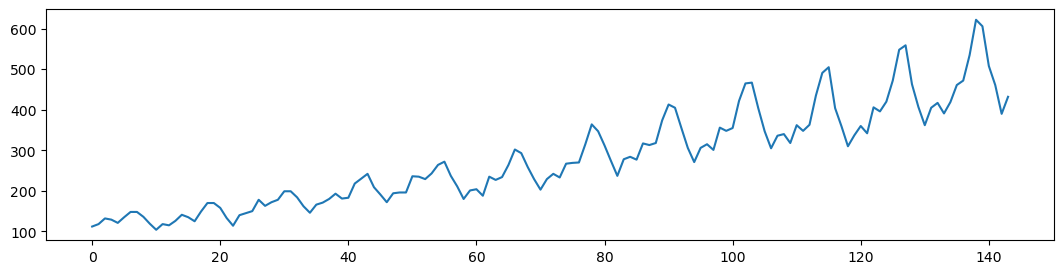

In [100]:
plt.figure(figsize = (13,3))
plt.plot(training_set)
plt.show()

In [101]:
def sliding_windows(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [102]:
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

In [103]:
# seq_len = 5
# final_data = df.Passengers 
# 
# for i in range(len(final_data)-seq_len-1):
#     print(np.array(final_data[i:i+seq_len]),final_data[i+seq_len])

In [104]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = torch.Tensor(np.array(x))
dataY = torch.Tensor(np.array(y))

trainX =torch.Tensor(np.array(x[0:train_size]))
trainX = trainX.to(device)
trainY =torch.Tensor(np.array(y[0:train_size]))
trainY = trainY.to(device)

testX = torch.Tensor(np.array(x[train_size:len(x)]))
testY = torch.Tensor(np.array(y[train_size:len(y)]))
testX = testX.to(device)
testY = testY.to(device)

## LSTM Pytorch Implementations

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

In [128]:
class LSTM(nn.Module):
    device = 'cpu'
    def __init__(self,num_classes,input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        hidden = torch.zeros(self.num_layers, x.size(0), self.hidden_size,device = self.device) 
        cell = torch.zeros(self.num_layers, x.size(0), self.hidden_size,device = self.device)
        # print(hidden.device) : cuda 
        # print(cell.device) : cuda 
        # print(x.device) : cuda 
        output, (hidden,cell) = self.lstm(x, (hidden, cell))
        
        # print(f'lstm output shape : {output.shape}') : (93,4,3) 
        # print(f'hidden shape : {hidden.shape}') : (1,93,3) 
        # print(f'cell shape : {cell.shape}') : (1,93,3)
        
        hidden = hidden.view(-1, self.hidden_size)
        # print(f'new hidden shape : {hidden.shape}') : (93,3)
        
        out = self.fc(hidden)
        # print(f'final output shape : {out.shape}') ; (93,1) 
        return out

In [137]:
num_epochs = 2000
learning_rate = 0.001
input_size = 1
hidden_size = 3
num_layers = 1
num_classes = 1
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

In [138]:
lstm

LSTM(
  (lstm): LSTM(1, 3, batch_first=True)
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [139]:
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [140]:
trainY.device

device(type='cpu')

In [141]:
lstm.device

'cpu'

In [142]:
# lstm output shape : torch.Size([93, 4, 3])
# hidden shape : torch.Size([1, 93, 3])
# cell shape : torch.Size([1, 93, 3])
# new hidden shape : torch.Size([93, 3])
# final output shape : torch.Size([93, 1])

In [143]:
trainX.shape

torch.Size([93, 4, 1])

In [144]:
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.01745
Epoch: 100, loss: 0.01167
Epoch: 200, loss: 0.00398
Epoch: 300, loss: 0.00381
Epoch: 400, loss: 0.00362
Epoch: 500, loss: 0.00342
Epoch: 600, loss: 0.00319
Epoch: 700, loss: 0.00297
Epoch: 800, loss: 0.00276
Epoch: 900, loss: 0.00257
Epoch: 1000, loss: 0.00240
Epoch: 1100, loss: 0.00226
Epoch: 1200, loss: 0.00215
Epoch: 1300, loss: 0.00205
Epoch: 1400, loss: 0.00196
Epoch: 1500, loss: 0.00186
Epoch: 1600, loss: 0.00179
Epoch: 1700, loss: 0.00176
Epoch: 1800, loss: 0.00174
Epoch: 1900, loss: 0.00173


In [145]:
lstm.eval()
train_predict = lstm(dataX)

In [146]:
train_predict

tensor([[0.0502],
        [0.0394],
        [0.0749],
        [0.0927],
        [0.0897],
        [0.0667],
        [0.0354],
        [0.0076],
        [0.0422],
        [0.0215],
        [0.0545],
        [0.0804],
        [0.0611],
        [0.0479],
        [0.1065],
        [0.1356],
        [0.1306],
        [0.1102],
        [0.0599],
        [0.0290],
        [0.0910],
        [0.0794],
        [0.0987],
        [0.1611],
        [0.1076],
        [0.1511],
        [0.1506],
        [0.1997],
        [0.1856],
        [0.1587],
        [0.1177],
        [0.0909],
        [0.1404],
        [0.1328],
        [0.1592],
        [0.1837],
        [0.1489],
        [0.1678],
        [0.2417],
        [0.2447],
        [0.2765],
        [0.1912],
        [0.1813],
        [0.1359],
        [0.1970],
        [0.1787],
        [0.1875],
        [0.2794],
        [0.2458],
        [0.2485],
        [0.2824],
        [0.3174],
        [0.3244],
        [0.2426],
        [0.2142],
        [0

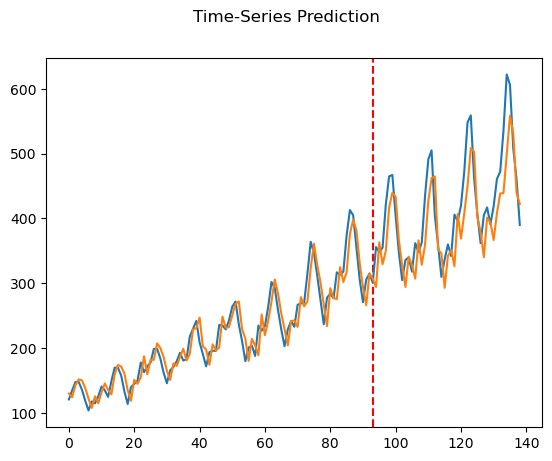

In [148]:
data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [153]:
lstm(testX[0].unsqueeze(0))

tensor([[0.3923]], grad_fn=<AddmmBackward0>)

In [233]:
lstm(inp.unsqueeze(0))

tensor([[0.3818]], grad_fn=<AddmmBackward0>)

In [236]:
with torch.no_grad():
    outs = []
    for i in range(0,30):
        if i ==0:
            inp = testX[0].unsqueeze(0)
        else:
            inp = inp.unsqueeze(0)
        ou = lstm(inp)
        inp = inp[0][1:4]
        inp = torch.cat((inp,ou),dim=0)
        outs.append(ou)

In [237]:
outs # prediction for the next 30 days 

[tensor([[0.3923]]),
 tensor([[0.3818]]),
 tensor([[0.3767]]),
 tensor([[0.3716]]),
 tensor([[0.3666]]),
 tensor([[0.3623]]),
 tensor([[0.3588]]),
 tensor([[0.3557]]),
 tensor([[0.3530]]),
 tensor([[0.3507]]),
 tensor([[0.3487]]),
 tensor([[0.3469]]),
 tensor([[0.3454]]),
 tensor([[0.3440]]),
 tensor([[0.3428]]),
 tensor([[0.3418]]),
 tensor([[0.3409]]),
 tensor([[0.3401]]),
 tensor([[0.3394]]),
 tensor([[0.3388]]),
 tensor([[0.3383]]),
 tensor([[0.3378]]),
 tensor([[0.3374]]),
 tensor([[0.3370]]),
 tensor([[0.3367]]),
 tensor([[0.3364]]),
 tensor([[0.3361]]),
 tensor([[0.3359]]),
 tensor([[0.3357]]),
 tensor([[0.3355]])]

In [238]:
testY

tensor([[0.3803],
        [0.4865],
        [0.4710],
        [0.4846],
        [0.6139],
        [0.6969],
        [0.7008],
        [0.5792],
        [0.4691],
        [0.3880],
        [0.4479],
        [0.4556],
        [0.4131],
        [0.4981],
        [0.4710],
        [0.5000],
        [0.6390],
        [0.7471],
        [0.7741],
        [0.5792],
        [0.4923],
        [0.3977],
        [0.4498],
        [0.4942],
        [0.4595],
        [0.5830],
        [0.5637],
        [0.6100],
        [0.7104],
        [0.8571],
        [0.8784],
        [0.6931],
        [0.5849],
        [0.4981],
        [0.5811],
        [0.6042],
        [0.5541],
        [0.6081],
        [0.6892],
        [0.7104],
        [0.8320],
        [1.0000],
        [0.9691],
        [0.7799],
        [0.6892],
        [0.5521]])